# Assignment-01 : Prediction using K-Neighbors Classifier Algorithm

# Name : FAISAL KHAN

# Id : 20191CSE0147

# In this task, we shall create the K-Neighbors Classifier and visualize it graphically

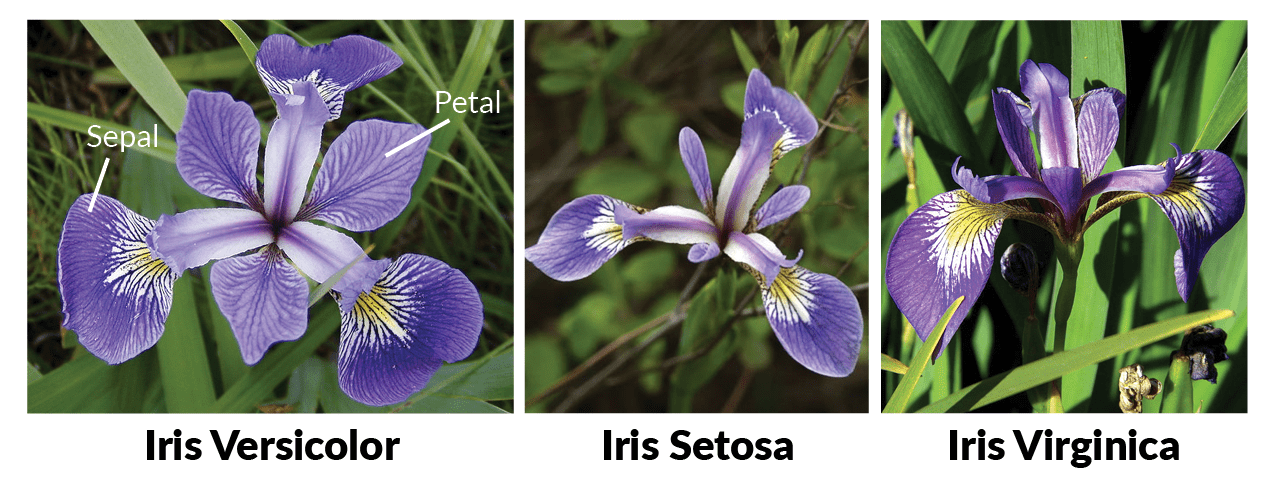

## Importing needed libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

## Loading the Iris dataset

In [77]:
Dataset= pd.read_csv("Iris.csv")
Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## A1 : Using the functionality to perform a train test split function

In [78]:
from sklearn.model_selection import train_test_split
X= Dataset.iloc[:,1:-1]
Y= Dataset.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

## A2 : Performing classification on the data set and finding the accuracy 

In [79]:
Dataset.info()
Dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## A3 : Using the KNeighborsClassifier() function 

In [80]:
Dataset.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [81]:
knn = KNeighborsClassifier(n_neighbors=7)

## A4 : Performing NN classification with functionalities and methods from sklearn.

In [82]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [83]:
print(knn.predict(x_test))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [84]:
print("Train accuracy score:",accuracy_score(y_train,knn.predict(x_train)))
print("Test accuracy score:",accuracy_score(y_test,knn.predict(x_test)))

Train accuracy score: 0.975
Test accuracy score: 0.9666666666666667


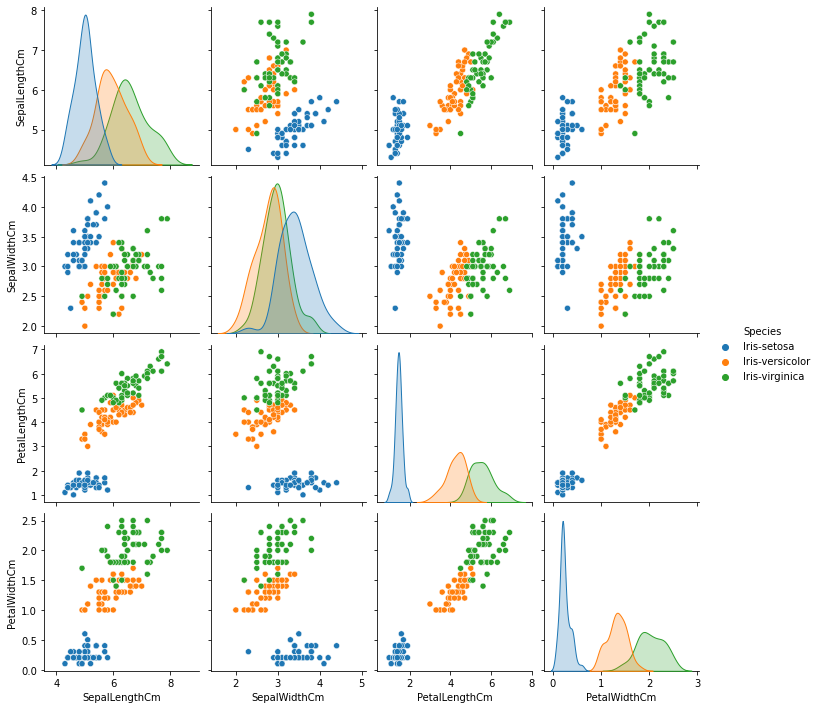

In [85]:
Dataset=Dataset.iloc[:,1:]
sns.pairplot(Dataset,hue='Species')

## A5 : Checking for accuracy attained with various values of k and interpreting the graph

In [86]:
print("Train accuracy score:",accuracy_score(y_train,knn.predict(x_train)))
print("Test accuracy score:",accuracy_score(y_test,knn.predict(x_test)))

Train accuracy score: 0.975
Test accuracy score: 0.9666666666666667


### Let us vary the value of k from 1 to 11 and check for accuracy 

### For Minimum Error 

			  Minimum error :  0.0 at K =  0


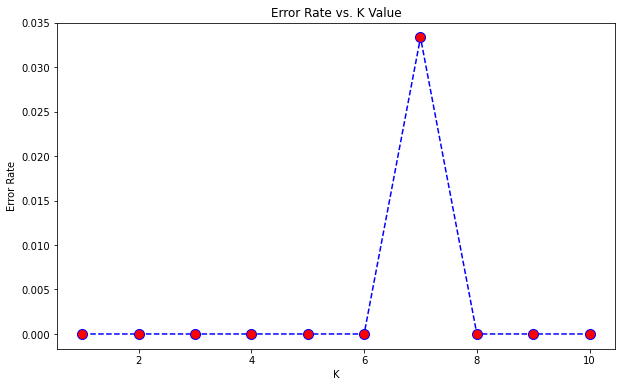

In [87]:
error_rate = []
for i in range(1,11):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("\t\t\t  Minimum error : ",min(error_rate),"at K = ",error_rate.index(min(error_rate)))

### For Maximum Accuracy

			  Maximum accuracy :  1.0 at K =  0


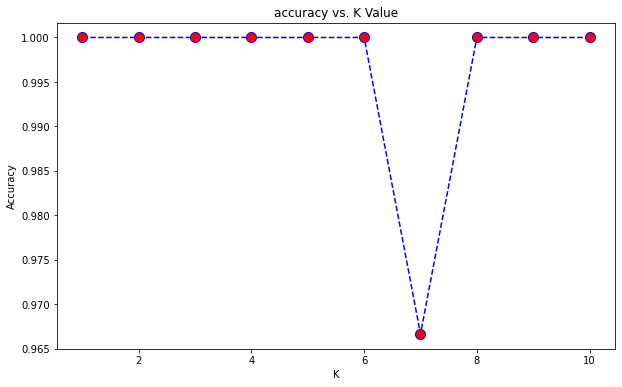

In [88]:
acc = []
from sklearn import metrics
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("\t\t\t  Maximum accuracy : ",max(acc),"at K = ",acc.index(max(acc)))

# A6 : Repeating A5 for other distance measures and checking the accuracy 

## Let us vary the value of k from 1 to 11 

### For Minimum Error 

			  Minimum error :  0.0 at K =  0


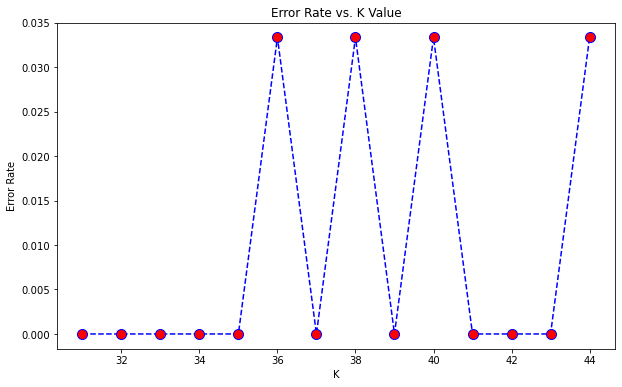

In [89]:
error_rate = []
for i in range(31,45):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(31,45),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("\t\t\t  Minimum error : ",min(error_rate),"at K = ",error_rate.index(min(error_rate)))

### For Maximum Accuracy 

			  Maximum accuracy :  1.0 at K =  0


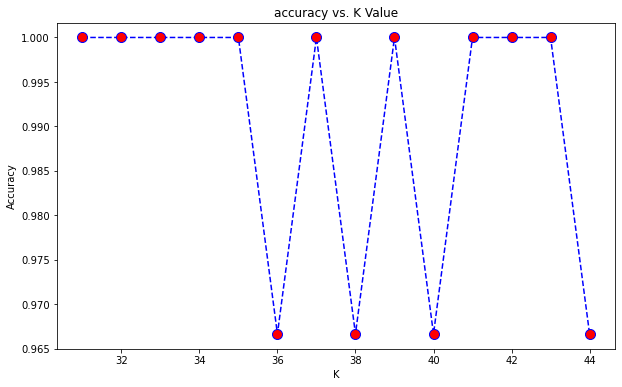

In [90]:
acc = []
from sklearn import metrics
for i in range(31,45):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(31,45),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("\t\t\t  Maximum accuracy : ",max(acc),"at K = ",acc.index(max(acc)))

# THANK YOU